# 🎯 Goal of Churn Analysis
Predict whether a customer is likely to churn (leave) or stay (remain) based on their behavior, usage patterns, and demographics.

## 1.Importing Libraries

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
# Handling class imbalance
from imblearn.over_sampling import SMOTE

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


## 2. Load dataset

In [4]:
#  Load dataset
Cust_Data = pd.read_csv("Customer_Churn_Analysis_Dataset.csv")

In [5]:
Cust_Data.shape

(7043, 21)

In [6]:
Cust_Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,C0001,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,C0002,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,C0003,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,C0004,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,C0005,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
Cust_Data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,C7039,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,C7040,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,C7041,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,C7042,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,C7043,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
# Shows the Missing Values
Cust_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
Cust_Data.isnull().sum().sum()

0

## Creating a Backup copy

In [10]:
Backup = Cust_Data.copy()

In [11]:
Cust_Data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
Cust_Data.duplicated().sum()

0

In [13]:
Cust_Data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
Cust_Data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
print(Cust_Data["gender"].unique())

['Female' 'Male']


In [16]:
# Loop through columns
for col in Cust_Data.columns:
    unique_values = Cust_Data[col].unique()
    print(f"{col}: {unique_values}\n")

customerID: ['C0001' 'C0002' 'C0003' ... 'C7041' 'C7042' 'C7043']

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit car

In [17]:
# Number of unique values in each column.
print(Cust_Data.nunique())


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [18]:
# Dropping CustomerID column 
Cust_Data = Cust_Data.drop(columns=["customerID"])

In [19]:
#Filter Data Frame
len(Cust_Data[Cust_Data["TotalCharges"]==" "])

11

In [20]:
#Fix missing/blank TotalCharges
Cust_Data["TotalCharges"] = Cust_Data["TotalCharges"].replace({" ":0.0})

In [21]:
Cust_Data["TotalCharges"] = Cust_Data["TotalCharges"].astype(float)

In [22]:
Numeric_Columns_Data = Cust_Data.select_dtypes(include = ["number"])

In [23]:
Numeric_Columns_Data.corr()
#-1 strong negative ,1 strong positive

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


In [24]:
Cust_Data.to_csv('Cleaned_Cust_data.csv')

In [25]:
# Checking the class distribution of target column
print(Cust_Data["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


# Insights
1. Customer ID removed as it is not required for modelling.

2. No missing values in the dataset
   
3. Missing Values in the TotalCharges column where replaced with 0
   
4. Class Imbalance Identified in the target
   

# Numerical Feature Analysis

In [26]:
#It is only work with numerical data
Cust_Data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [27]:
Cust_Data.shape

(7043, 20)

In [28]:
Cust_Data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
# Select numerical columns
num_features = Cust_Data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:", list(num_features))


Numerical Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


## 3. Exploratory Data Analysis(EDA)

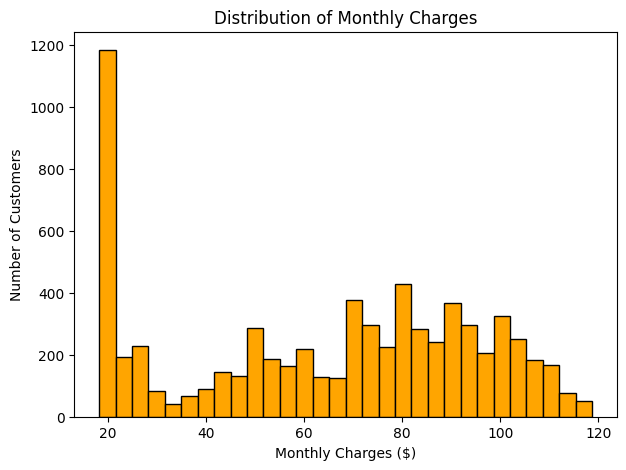

In [30]:
plt.figure(figsize=(7,5))
plt.hist(Cust_Data['MonthlyCharges'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')
plt.show()


### **Conclusion**
1. The monthly charges distribution shows a very high number of customers paying around `$18–$20`, indicating many basic-plan users.

2. Charges from `$25 to $100` are widely spread, reflecting diverse service combinations.

3. A strong concentration exists between `$60 to $100`, where many customers use bundled or premium services.

4. Very few customers pay above `$110`, showing limited adoption of high-tier plans.

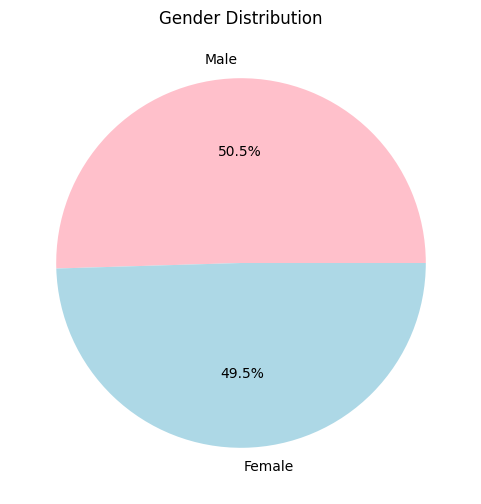

In [31]:
gender_counts = Cust_Data['gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Gender Distribution')
plt.show()


### **Conclusion**

The gender distribution is nearly equal, with 50.5% male and 49.5% female customers.  
This shows that the dataset has no major gender imbalance.


<Figure size 700x500 with 0 Axes>

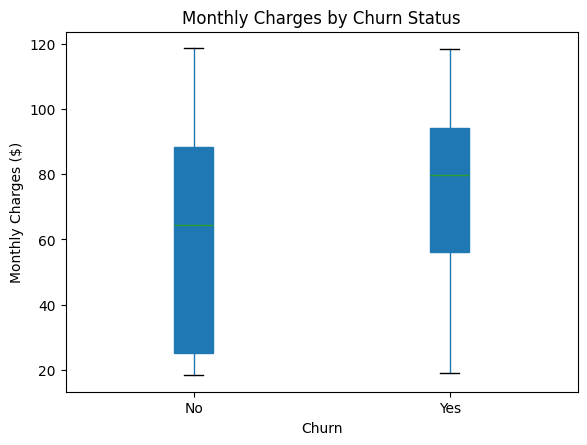

In [32]:
plt.figure(figsize=(7,5))
Cust_Data.boxplot(column='MonthlyCharges', by='Churn', grid=False, patch_artist=True)
plt.title('Monthly Charges by Churn Status')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()


### **Conclusion**

Customers who churn generally have **higher monthly charges** compared to those who stay.
This suggests that **higher billing amounts may contribute to churn**, as these customers tend to leave more often.


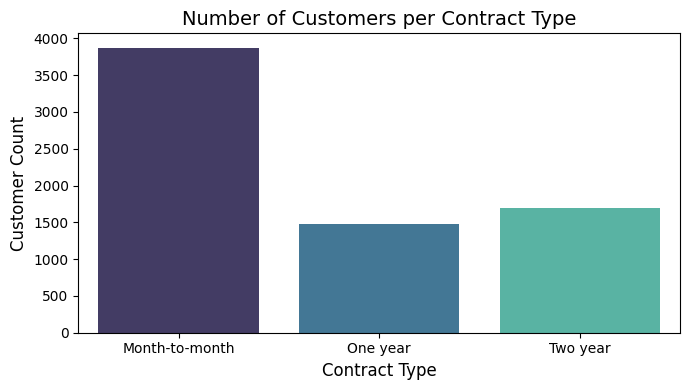

In [33]:
plt.figure(figsize=(7,4))
sns.countplot(x="Contract", hue="Contract", data=Cust_Data, palette="mako", legend=False)


plt.title("Number of Customers per Contract Type", fontsize=14)
plt.xlabel("Contract Type", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.tight_layout()
plt.show()

### **Conclusion**

Most customers use Month-to-month contracts, showing they prefer flexibility and short commitments.
One-year and Two-year contracts have far fewer customers, indicating that long-term plans are less popular.
This pattern suggests that customers may avoid long contracts, possibly due to cost concerns or uncertainty.

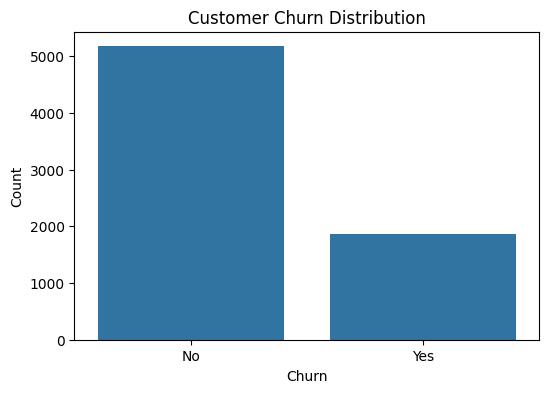

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x = "Churn", data = Cust_Data,legend = False)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

### **Conclusion**

The bar chart clearly shows that most customers did not churn, while a significantly smaller portion did churn. This indicates that the dataset is highly imbalanced, with many more non-churned customers than churned ones.

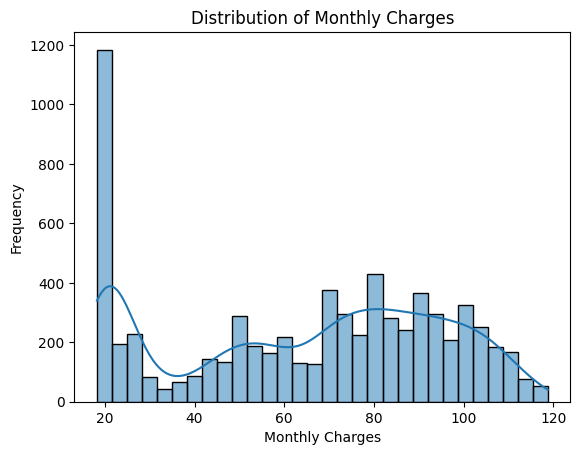

In [35]:
# A Histogram helps visualize distribution shape of your numerical data - 

sns.histplot(Cust_Data['MonthlyCharges'], bins=30, kde=True)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()


### **Conclusion**
The histogram shows that many customers pay around $20, with other charges spread between $25–$120. The distribution is mixed, suggesting multiple pricing tiers.

## Skewed Data
When data is skewed, it means the values are not evenly spread around the average — one side of the graph has a longer tail than the other.

In [36]:
# Skewness for numerical columns
# 0 shows symmetrical(Normal) Interpretation
# > 0 Right skewed (long right tail) positive
# < 0 Left Skewed (Long Left tail)
# > 1 or <-1 highly skewed 
skew_values = Cust_Data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].skew()
print("Skewness of numerical features:\n", skew_values)

Skewness of numerical features:
 SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64


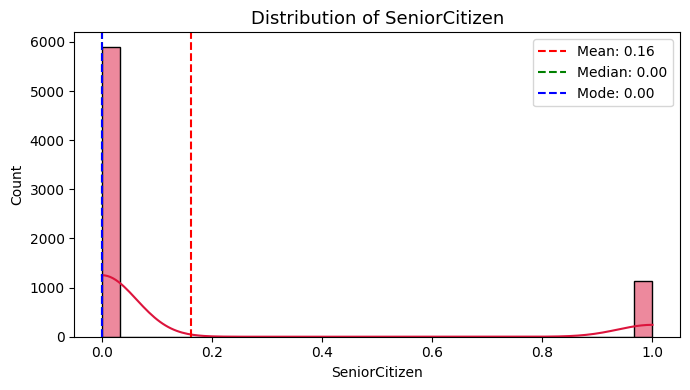

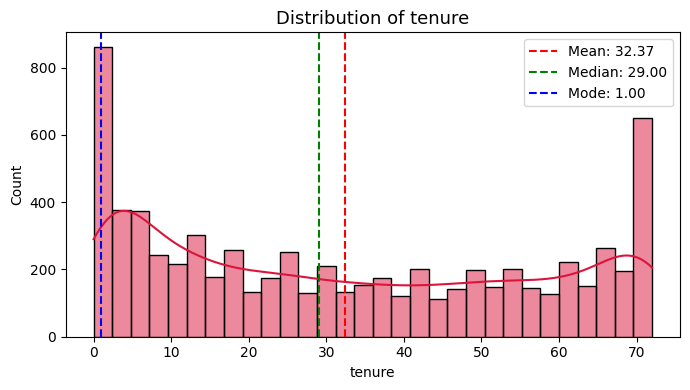

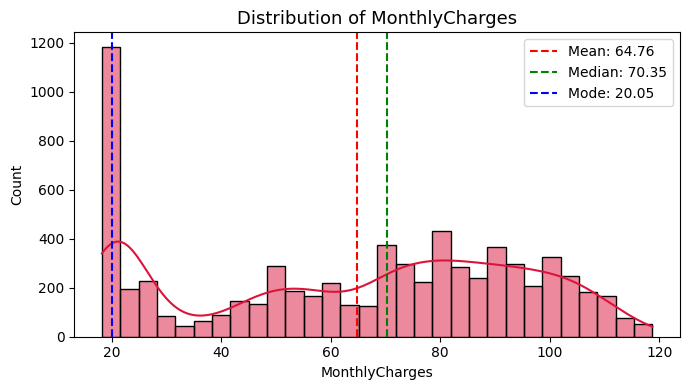

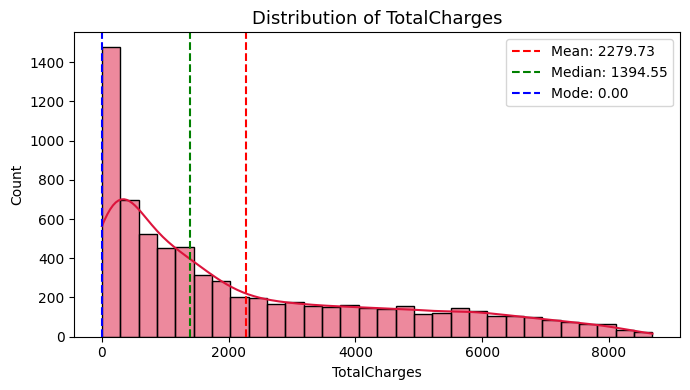

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

def plot_histograms(Cust_Data, num_cols):
    for col in num_cols:
        plt.figure(figsize=(7, 4))
        sns.histplot(Cust_Data[col], kde=True, color='crimson', bins=30)
        plt.title(f"Distribution of {col}", fontsize=13)
        plt.xlabel(col)
        plt.ylabel("Count")

        # Calculate mean, median, and mode for each column
        col_mean = Cust_Data[col].mean()
        col_median = Cust_Data[col].median()
        col_mode = Cust_Data[col].mode()[0]  # mode() returns a series

        # Add vertical lines for mean, median, and mode
        plt.axvline(col_mean, color='red', linestyle='--', label=f"Mean: {col_mean:.2f}")
        plt.axvline(col_median, color='green', linestyle='--', label=f"Median: {col_median:.2f}")
        plt.axvline(col_mode, color='blue', linestyle='--', label=f"Mode: {col_mode:.2f}")

        plt.legend()
        plt.tight_layout()
        plt.show()

# Call the function
plot_histograms(Cust_Data, num_cols)


### **Conclusion**

1. SeniorCitizen is right-skewed (Strongly Positive) and tail on the right side because most customers are non-seniors.
2. tenure Slightly Positive (Almost Symmetrical) Tenure (customer duration) is fairly balanced. Customers are spread across short, medium, and long durations. No major skew.
3. MonthlyCharges Slightly Negative. Most customers have medium to high monthly charges, with fewer very low values. The distribution is fairly even — no strong skew.
4. TotalCharges Moderately Positive (Right Skewed). Many customers have low total charges (new customers), and fewer have high total charges (long-term users). Common in churn data.

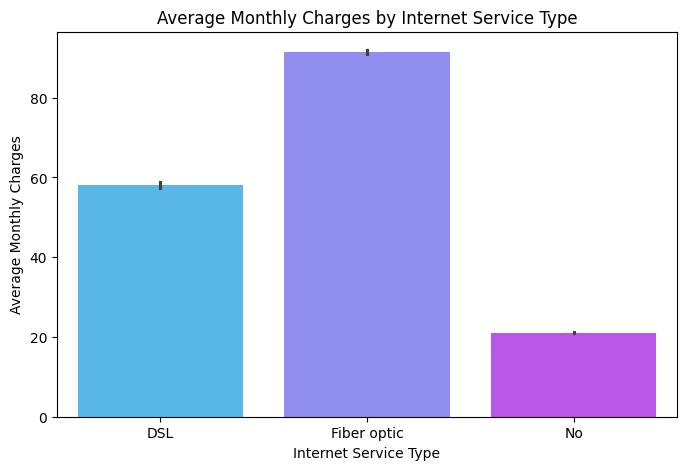

In [38]:
plt.figure(figsize=(8,5))

sns.barplot(x='InternetService', y='MonthlyCharges',hue='InternetService', data=Cust_Data,palette='cool',legend=False)
plt.title('Average Monthly Charges by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Average Monthly Charges')
plt.show()


### **Box Plots** 
A Box Plot is a way of statstically representing the distribution of the data through five main dimentions:

1. Minimum: smallest number in the dataset excluding the outliers.

2. First Queartile: Middle number between the minimum  and the median.

3. second quartile(Median): Middle number of the sorted dataset

4. Third quartile: middle number between Median and Maximum.

5. Maximum: Highest Number in the dataset excluding the outliers.

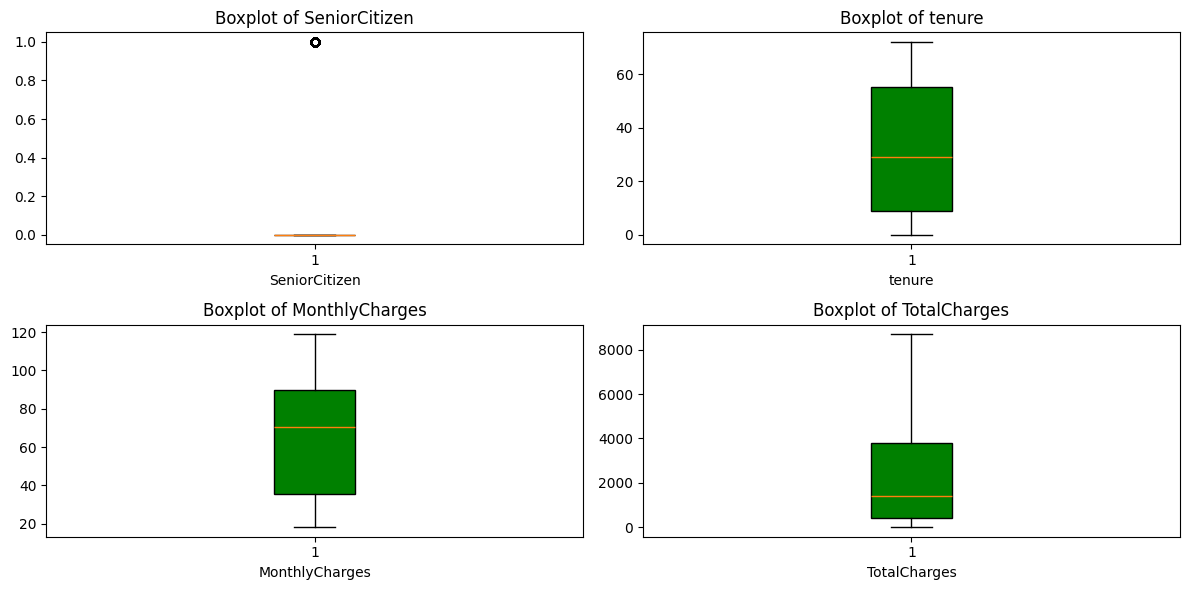

In [39]:
plt.figure(figsize=(12,6))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(Cust_Data[col], patch_artist=True, boxprops=dict(facecolor='green'))
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


### **Conclusion**
1) The SeniorCitizen plot shows most customers are not senior citizens (value 0), with few senior customers (value 1) appearing as outliers due to imbalance in data.
2) The tenure distribution is right-skewed, showing many new customers and a few long-term ones appearing as outliers.
3) The MonthlyCharges plot shows moderate variation, with most customers paying mid-range charges and a few high-paying customers marked as outliers.
4) The TotalCharges plot is highly skewed, showing a few high-paying customers with long tenure as outliers, representing valuable revenue contributors.

C:\Users\TEJAL KATALKAR\AppData\Local\Temp\ipykernel_24440\3161304578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Contract", y="MonthlyCharges", data=Cust_Data, palette="coolwarm")


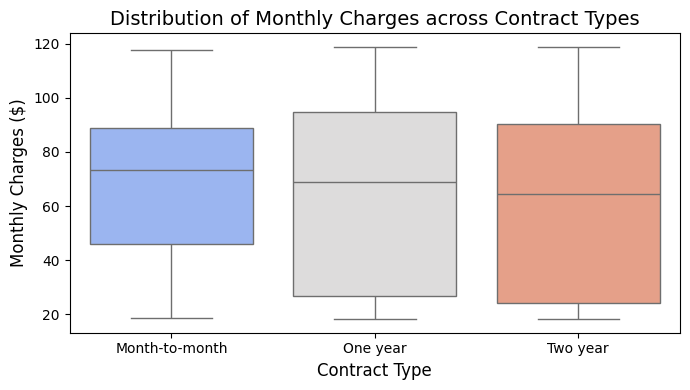

In [40]:
#  Box Plot – Distribution of Monthly Charges across Contract Types
plt.figure(figsize=(7,4))
sns.boxplot(x="Contract", y="MonthlyCharges", data=Cust_Data, palette="coolwarm")

plt.title("Distribution of Monthly Charges across Contract Types", fontsize=14)
plt.xlabel("Contract Type", fontsize=12)
plt.ylabel("Monthly Charges ($)", fontsize=12)
plt.tight_layout()
plt.show()

### **Conclusion**
This suggests a trade-off between flexibility and cost: short-term customers pay more, long-term customers save.

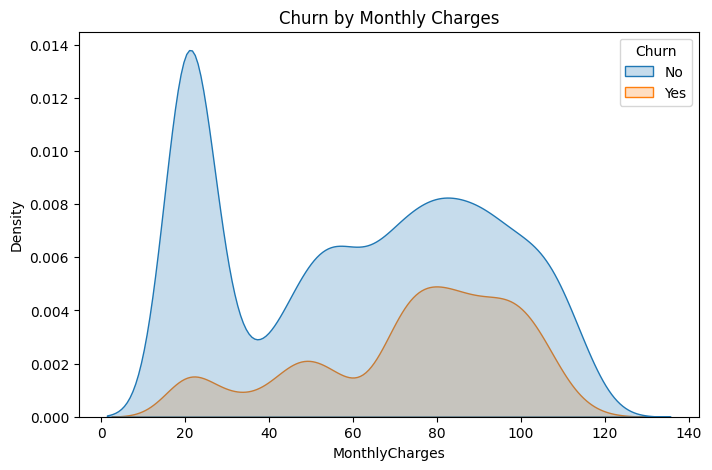

In [41]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=Cust_Data, x='MonthlyCharges', hue='Churn', fill=True)
plt.title("Churn by Monthly Charges")
plt.show()


### **Conclusion**
Customers paying higher monthly charges churn more often. The churn density curve rises noticeably in the 60–100+ range, indicating that monthly charges are an important predictor of churn — higher bills increase the likelihood of leaving.

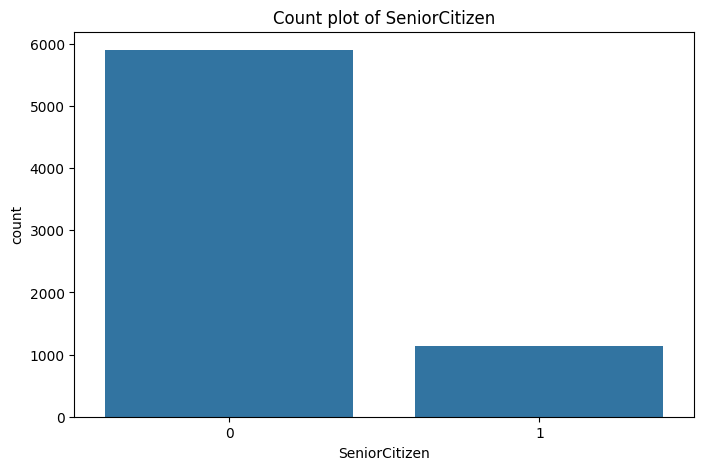

In [89]:
# Select object (categorical) columns
objcol = Cust_Data.select_dtypes(include="object").columns.to_list()
objcol.append("SeniorCitizen")  

# Loop through each categorical column
for col in objcol:
    plt.figure(figsize=(8,5))#
    sns.countplot(x=Cust_Data[col])
    plt.title(f"Count plot of {col}")
    plt.show()

### **Conclusion**
The plot shows that the majority of customers are non–senior citizens, with only a small minority classified as senior citizens.

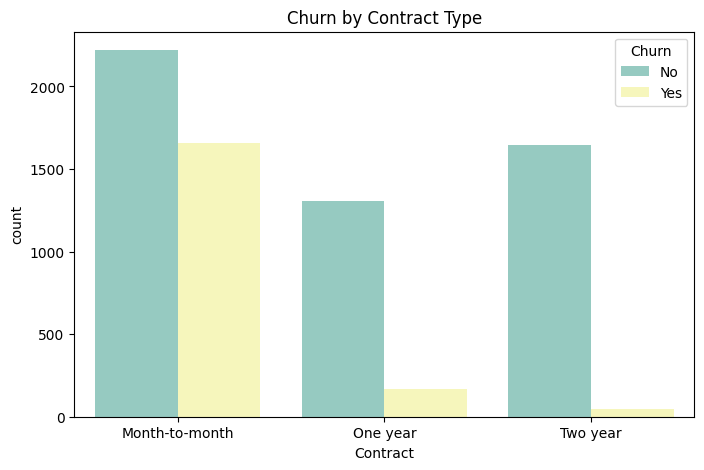

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=Cust_Data, palette='Set3')
plt.title("Churn by Contract Type")
plt.show()


### **Conclusion**
Customers with month-to-month contracts churn the most, while churn is very low for one-year Contract and especially two-year contracts. This means contract type is a strong predictor of churn — longer contracts significantly reduce churn probability.


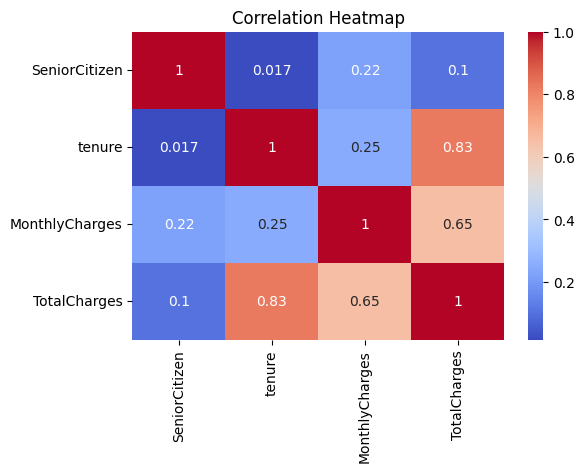

In [44]:
Cust_Data['TotalCharges'] = pd.to_numeric(Cust_Data['TotalCharges'], errors='coerce')

plt.figure(figsize=(6,4))
sns.heatmap(Cust_Data[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### **Conclusion**

The heatmap shows that TotalCharges is highly correlated with both tenure and MonthlyCharges, meaning customers who stay longer or pay higher monthly fees accumulate more total charges. Other relationships—especially those involving SeniorCitizen—are very weak, indicating they do not strongly influence the numerical variables in the dataset.

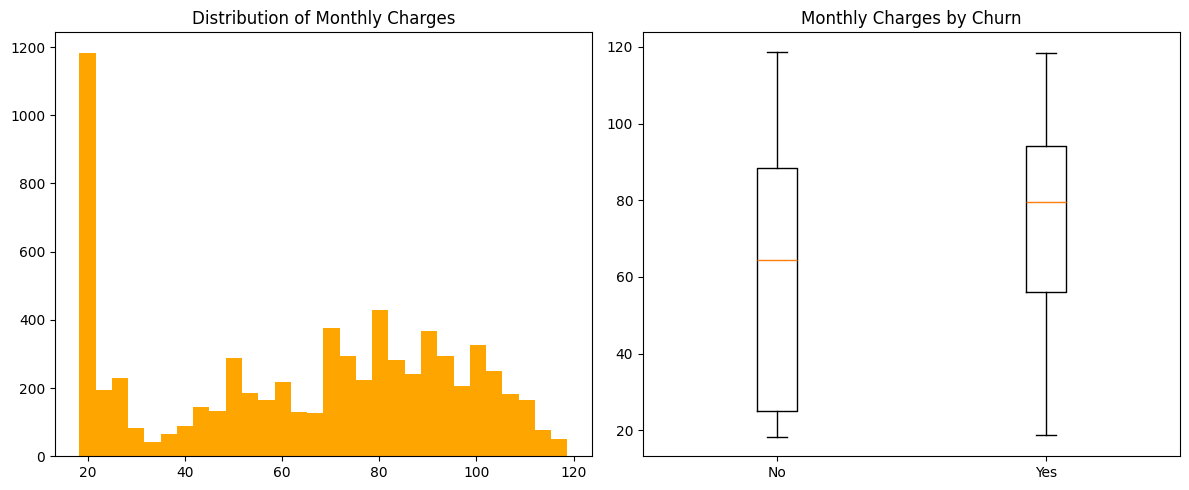

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Left plot
axes[0].hist(Cust_Data['MonthlyCharges'], bins=30, color='orange')
axes[0].set_title('Distribution of Monthly Charges')

# Right plot
axes[1].boxplot([Cust_Data[Cust_Data['Churn']=='No']['MonthlyCharges'],
                 Cust_Data[Cust_Data['Churn']=='Yes']['MonthlyCharges']])
axes[1].set_xticklabels(['No', 'Yes'])
axes[1].set_title('Monthly Charges by Churn')

plt.tight_layout()
plt.show()


### **Conclusion**
The distribution of Monthly Charges shows most customers pay between $20–$120, with a noticeable spike at the lower end, indicating many customers are on basic or low-cost plans.

The boxplot comparison clearly shows that customers who churned generally have higher Monthly Charges compared to those who stayed.
This means higher monthly bills are associated with a higher likelihood of churn.

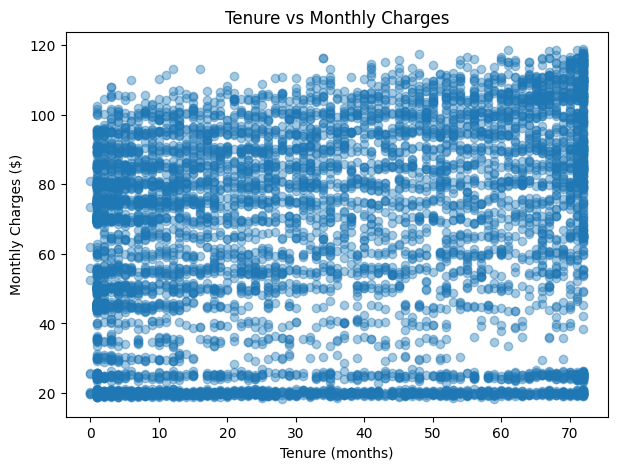

In [46]:
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(Cust_Data['tenure'], Cust_Data['MonthlyCharges'], 'o', alpha=0.4)
ax.set_title('Tenure vs Monthly Charges')
ax.set_xlabel('Tenure (months)')
ax.set_ylabel('Monthly Charges ($)')

plt.show()


### **Conclusion**

Tenure shows no meaningful correlation with monthly charges, so it has low predictive power. An ML model will depend more on features like service type, contract, and add-ons to predict monthly charges.

Text(0.5, 1.03, 'Monthly Charges vs Total Charges (with Regression Line)')

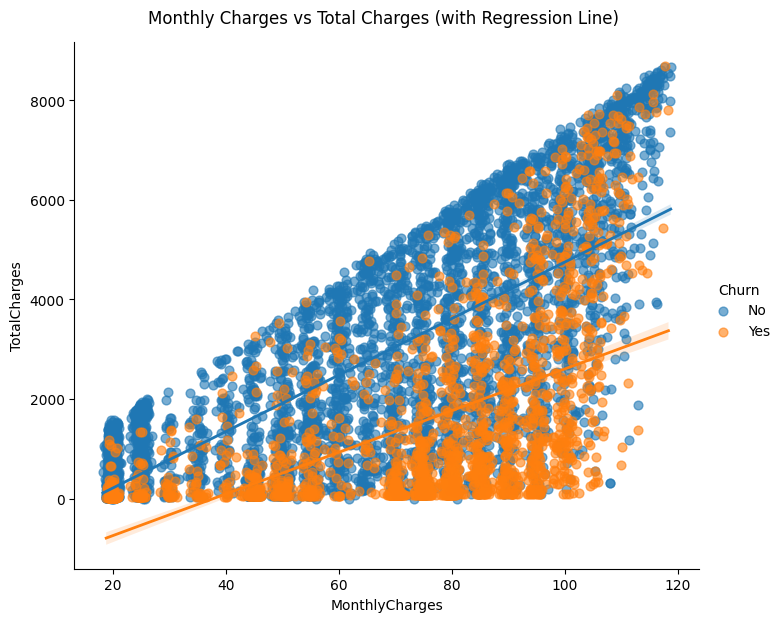

In [47]:
reg = sns.lmplot(
    data=Cust_Data,
    x='MonthlyCharges',
    y='TotalCharges',
    hue='Churn',
    fit_reg=True,
    height=6,
    aspect=1.2,
    scatter_kws={'s':40, 'alpha':0.6},
    line_kws={'linewidth':2}
)

reg.fig.suptitle("Monthly Charges vs Total Charges (with Regression Line)", y=1.03)


### **Conclusion**

1)For both churned and non-churned customers, TotalCharges increase as MonthlyCharges increase.

2)Non-churn customers pay more overall—the blue regression line is higher because they stay with the company longer.

3)Churned customers pay less—the orange line is lower, reflecting shorter tenure.

4)Even with high MonthlyCharges, churned customers have low TotalCharges since they leave early, making tenure the strongest factor influencing churn.

## Step 3: Label Encoding & Save Encoders
Encode Categorical Variables

In [48]:
Cust_Data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [49]:
import os
import pickle
from sklearn.preprocessing import LabelEncoder

# Create encoders folder if not exists
if not os.path.exists("encoders"):
    os.makedirs("encoders")

encoders = {}
categorical_cols = Cust_Data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    Cust_Data[col] = le.fit_transform(Cust_Data[col])
    encoders[col] = le

    # Save encoder
    pickle.dump(le, open(f"encoders/{col}.pkl", "wb"))

print("Encoders saved successfully!")


Encoders saved successfully!


In [50]:
print(Cust_Data.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

In [51]:
print(Cust_Data.dtypes)

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object


In [52]:
print(Cust_Data.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

In [53]:
X = Cust_Data.drop('Churn', axis=1)  # independent variables
y = Cust_Data['Churn']                # target variable

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
print(X)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [56]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32


# Standard Scaling + Save scaler

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pickle.dump(scaler, open("models/scaler.pkl", "wb"))
print("Scaler saved!")

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Scaler saved!
X_train shape: (4930, 19)
X_test shape: (2113, 19)


In [58]:
print(X_train)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1695       1              0        1           1      54             1   
1095       1              0        0           0       1             1   
3889       1              0        0           0      13             1   
3667       0              1        1           1      24             1   
2902       0              1        0           0       6             1   
...      ...            ...      ...         ...     ...           ...   
3772       1              0        1           0       1             1   
5191       0              0        1           1      23             1   
5226       1              0        1           1      12             1   
5390       1              1        0           0      12             1   
860        1              0        0           0      26             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1695              2                0     

# SMOTE (Synthetic Minority Oversampling Technique)

SMOTE (Synthetic Minority Over-sampling Technique)
is a machine-learning technique used to balance an imbalanced dataset by creating synthetic samples for the minority class.

In [59]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Churn
0    3635
1    1295
Name: count, dtype: int64
After SMOTE: Churn
0    3635
1    3635
Name: count, dtype: int64


# Model Training

In [60]:
# 1. Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_res, y_train_res)

LogisticRegression()

### Model Evaluation
Evaluating the model using accuracy and classification report to understand performance.

In [61]:
# Predict on test data
y_pred_log = log_model.predict(X_test_scaled)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Logistic Regression Accuracy: 0.759110269758637

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1539
           1       0.54      0.83      0.65       574

    accuracy                           0.76      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.81      0.76      0.77      2113


Confusion Matrix:
[[1130  409]
 [ 100  474]]


In [62]:
log_cv = cross_val_score(log_model, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("Logistic Regression CV Accuracy:", log_cv)
print("Mean Accuracy:", log_cv.mean())


Logistic Regression CV Accuracy: [0.75240715 0.7647868  0.77716644 0.7696011  0.77097662]
Mean Accuracy: 0.7669876203576341


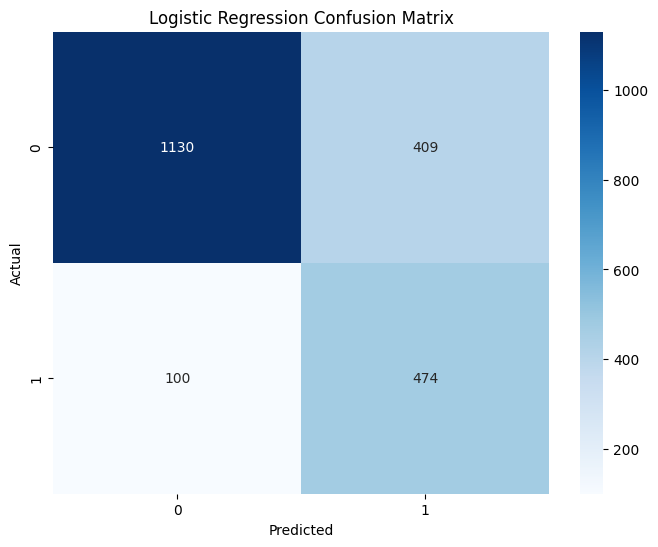

In [63]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log )
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [64]:
# 2. Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [65]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test,y_pred_rf ))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7813535257927118

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1539
           1       0.60      0.58      0.59       574

    accuracy                           0.78      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113


Confusion Matrix:
[[1319  220]
 [ 242  332]]


In [66]:
rf_cv = cross_val_score(rf_model, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy:", rf_cv)
print("Mean Accuracy:", rf_cv.mean())

Random Forest CV Accuracy: [0.7696011  0.80467675 0.90302613 0.90577717 0.88858322]
Mean Accuracy: 0.8543328748280606


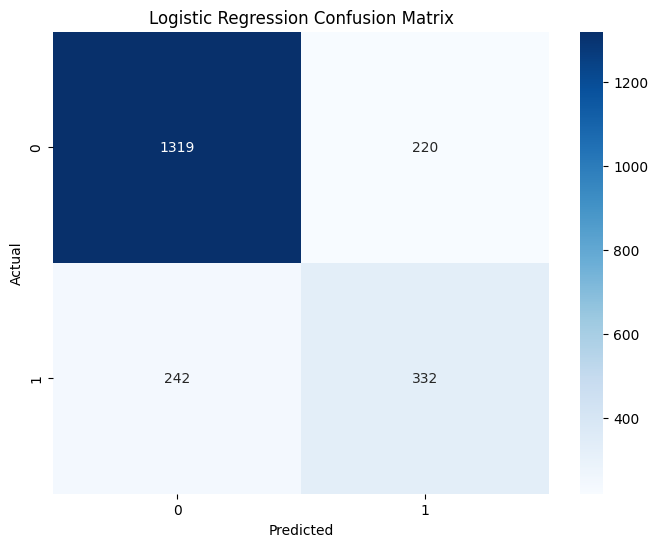

In [67]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf )
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
# 3. XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [69]:
# XGBoost Evaluation
y_pred_xgb = xgb_model.predict(X_test_scaled)
# Accuracy
print("XGBoost Accuracy:", accuracy_score(y_test,y_pred_xgb))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7827733080927591

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1539
           1       0.60      0.60      0.60       574

    accuracy                           0.78      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113


Confusion Matrix:
[[1312  227]
 [ 232  342]]


In [70]:
xgb_cv = cross_val_score(xgb_model, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("XGBoost CV Accuracy:", xgb_cv)
print("Mean Accuracy:", xgb_cv.mean())

XGBoost CV Accuracy: [0.72352132 0.76891334 0.90921596 0.90165062 0.89958735]
Mean Accuracy: 0.8405777166437414


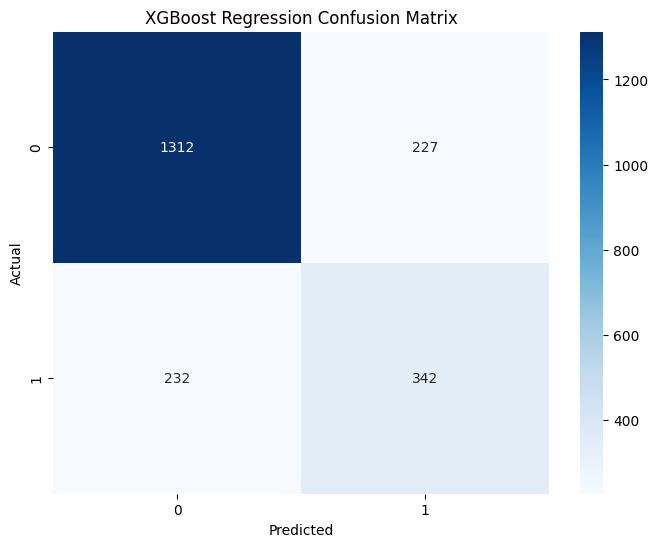

In [71]:
# confusion Matrix
Conf_Matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(Conf_Matrix, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [72]:
# Model Comparison Table
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ]
}

df_results = pd.DataFrame(results)
df_results


,Model,Accuracy
0,Logistic Regression,0.759110
1,Random Forest,0.781354
2,XGBoost,0.782773


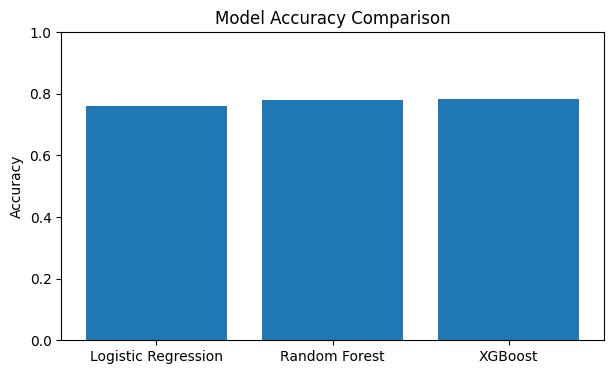

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.bar(df_results["Model"], df_results["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


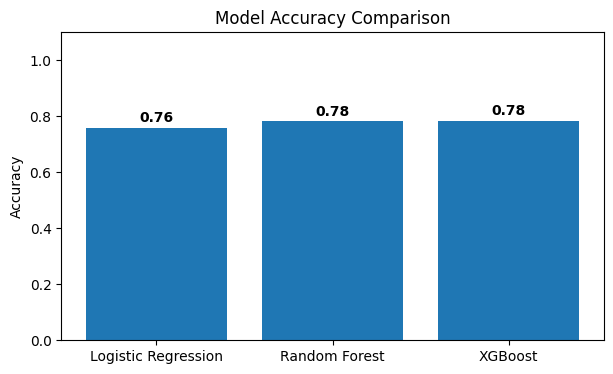

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
bars = plt.bar(df_results["Model"], df_results["Accuracy"])

# Add value labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.01,
             f"{height:.2f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1.10)  # Give extra space for labels
plt.show()


## Conclusion:
Random Forest gives the higher accuracy compared to other models with default parameters

### Saving Trained Models
The trained models and scaler are saved using pickle so they can be used later for deployment in Streamlit.

In [75]:
#Features of the data
X.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [76]:
#  SAVE TRAINED MODELS INTO PKL FILES

import os
import pickle

# Create models folder if not exists
if not os.path.exists("models"):
    os.makedirs("models")


# Save each model separately
pickle.dump(log_model, open("models/logistic.pkl", "wb"))
pickle.dump(rf_model, open("models/randomforest.pkl", "wb"))
pickle.dump(xgb_model, open("models/xgboost.pkl", "wb"))

print("Individual model files saved successfully!")

# Save all models in one dictionary (optional but useful)
all_models = {
    "logistic": log_model,
    "random_forest": rf_model,
    "xgboost": xgb_model,
    "feature_names":X.columns.tolist()
}

pickle.dump(all_models, open("models/all_models.pkl", "wb"))
print("All models saved successfully into all_models.pkl!")


Individual model files saved successfully!
All models saved successfully into all_models.pkl!


In [77]:
# Load the saved model and build the predictive system

In [78]:
# Load the saved model and the feature names
import pickle

with open("models/all_models.pkl", "rb") as f:
    all_models = pickle.load(f)

loaded_model = all_models["random_forest"]   # your trained RF model
feature_names = all_models["feature_names"]  # feature columns used during training

print("Random Forest model loaded!")
print("Feature names:", feature_names)


Random Forest model loaded!
Feature names: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [79]:
input_data = {
    "Gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}
#  Create DataFrame
input_data_df = pd.DataFrame([input_data])

# Load saved encoders

# Load each encoder from the encoders folder
encoders = {}
categorical_cols = input_data_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    encoder_path = f"encoders/{col}.pkl"
    if os.path.exists(encoder_path):
        with open(encoder_path, "rb") as f:
            encoders[col] = pickle.load(f)
    else:
        print(f"Warning: Encoder not found for column: {col}")

#  Transform categorical features
for col, encoder in encoders.items():
    input_data_df[col] = encoder.transform(input_data_df[col])
    
# Convert to numpy to avoid warning
input_array = input_data_df.to_numpy()

prediction = loaded_model.predict(input_array)[0]
pred_prob = loaded_model.predict_proba(input_array)[0]

label = "Churn" if prediction == 1 else "No Churn"

print("Prediction:", prediction)
print("Prediction:", label)
print(f"Prediction Probability: {pred_prob}")


Prediction: 1
Prediction: Churn
Prediction Probability: [0.21 0.79]


In [80]:
input_data_df.head()

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [81]:
encoders

{'Gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}